Minitarea 5 - Los módulos elásticos de la Tierra
<hr/>
<b>Nombre</b>: Bryan Camilo Restrepo Arcila
<br/>
<b>Cédula</b>: 1000567825
<br/>



Obtenga los datos del interior de la Tierra que vienen con el PREM (densidad y velocidad de ondas S y P). 

- A partir de esos datos y usando los modelos teóricos vistos en clase calcule el valor del módulo de compresibilidad K y el módulo de rigidez μ para la Tierra a cada profundidad.  Haga un gráfico de K y μ como función del radio.

- Con los datos obtenidos, calcule el módulo de Young y el cociente de Poisson para la materia de la que esta hecha el interior de la Tierra (al menos para el manto y el núcleo sólido) y de ellos el valor de los coeficientes de Lame.

Extracción datos del PREM

In [1]:
!pip install -Uq rockhound

Importación librerias

In [2]:
import rockhound as rh
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, Eq, solve

In [3]:
# Define the PREM model
prem = rh.fetch_prem()

A partir de esos datos y usando los modelos teóricos vistos en clase calcule el valor del módulo de compresibilidad K y el módulo de rigidez μ para la Tierra a cada profundidad.  Haga un gráfico de K y μ como función del radio.

estos modulos pueden ser encontrados a partir de estas expresiones:

Velocidad de las ondas, S:
$$
v_s = \sqrt{\frac{\mu}{\rho}} 
$$
entonces:
$$
\mu = \frac{V_s^2}{\rho}
$$

Velocidad de las ondas, P
$$
v_p = \sqrt{\frac{K + \frac{4}{3}\mu}{\rho}}
$$
entonces:

$$
K = V_p^2 \rho - \frac{4\mu}{3}
$$

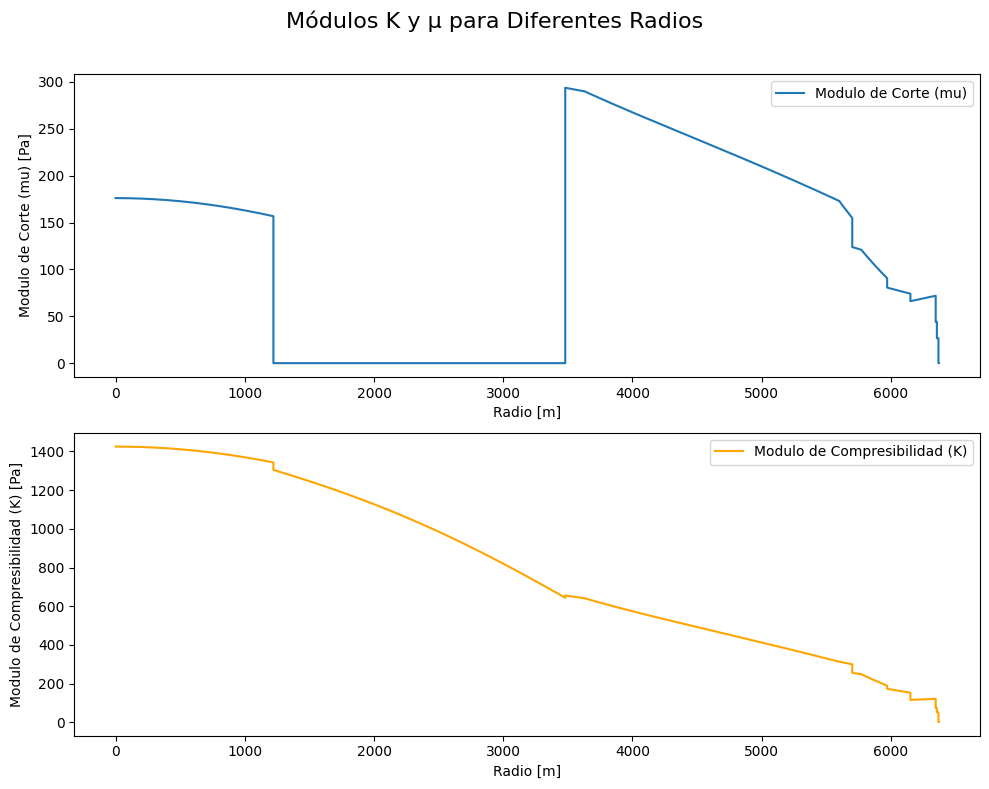

In [4]:
# Cálculo de mu y K a partir del dataframe
prem['mu'] = prem['Vsh'] ** 2 * prem['density']
prem['K'] = prem['Vpv'] ** 2 * prem['density'] - (4/3) * prem['mu']

# Crear subplots para K y mu
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de mu (módulo de corte)
axs[0].plot(prem['radius'], prem['mu'], label='Modulo de Corte (mu)')
axs[0].set_xlabel('Radio [m]')
axs[0].set_ylabel('Modulo de Corte (mu) [Pa]')
axs[0].legend()

# Gráfico de K (módulo de compresibilidad)
axs[1].plot(prem['radius'], prem['K'], label='Modulo de Compresibilidad (K)', color='orange')
axs[1].set_xlabel('Radio [m]')
axs[1].set_ylabel('Modulo de Compresibilidad (K) [Pa]')
axs[1].legend()

# Agregar un título global a los subplots
fig.suptitle('Módulos K y μ para Diferentes Radios', fontsize=16, fontweight='bold')

# Mostrar gráficos
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Ajustar el espacio superior para acomodar el título global
plt.show()

Se puede observar que el modulo de corte se hace cero en cierto intervalo, esto representa el interior liquido de nuestro planeta en el cual no se propagan las ondas S, ya que estás solo se propagan en solidos, inclusive nos proporciona información de la profundidad a la que se encuentra nuestro nucleo liquido y el tamaño que ete representa

--------
Con los datos obtenidos, calcule el módulo de Young y el cociente de Poisson para la materia de la que esta hecha el interior de la Tierra (al menos para el manto y el núcleo sólido) y de ellos el valor de los coeficientes de Lame.

In [5]:
# Definir símbolos
E, v, mu, K = symbols('E v mu K')

# Definir ecuaciones según las imágenes
eq1 = Eq(mu, E / (2 * (1 + v)))
eq2 = Eq(K, E / (3 * (1 - 2 * v)))

# Despejar E y v en términos de mu y K
solutions = solve((eq1, eq2), (E, v), dict=True)


[{E: 9*K*mu/(3*K + mu), v: (3*K/2 - mu)/(3*K + mu)}]

In [ ]:
# Utilizando las ecuaciones obtenidas de sympy
E_values = []
v_values = []
for _, row in prem.iterrows():
    mu_val = row['mu']
    K_val = row['K']
    
    # Evaluar las soluciones
    numerical_solution = solutions[0]
    E_value = numerical_solution[E].subs({mu: mu_val, K: K_val}).evalf()
    v_value = numerical_solution[v].subs({mu: mu_val, K: K_val}).evalf()
    
    E_values.append(E_value)
    v_values.append(v_value)
    
# Agregar las nuevas columnas calculadas al dataframe del PREM
prem['E'] = E_values
prem['v'] = v_values

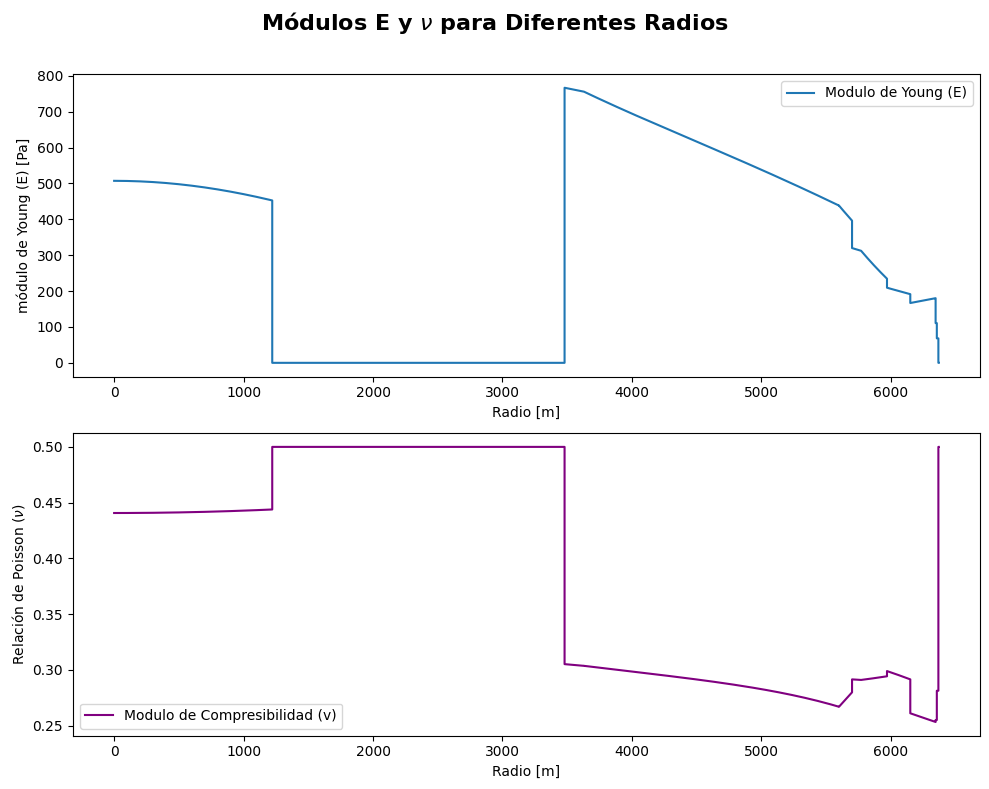

In [6]:
# Crear figuras y ejes para los gráficos
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de E (módulo de Young)
axs[0].plot(prem['radius'], prem['E'], label='Modulo de Young (E)')
axs[0].set_xlabel('Radio [m]')
axs[0].set_ylabel('módulo de Young (E) [Pa]')
axs[0].legend()

# Gráfico de K (módulo de compresibilidad)
axs[1].plot(prem['radius'], prem['v'], label='Modulo de Compresibilidad (v)', color='purple')
axs[1].set_xlabel('Radio [m]')
axs[1].set_ylabel(r'Relación de Poisson ($\nu$)')
axs[1].legend()

# Agregar un título global a los subplots
fig.suptitle(r'Módulos E y $\nu$ para Diferentes Radios', fontsize=16, fontweight='bold')

# Mostrar gráficos
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Ajustar el espacio superior para acomodar el título global
plt.show()

Del punto anterior ya tenemos el calculo del coeficiente de Lame $\mu$, poodemos calcular el segundo coeficiente de Lame $\lambda$ a partir de la siguiente expresión:
$$
\lambda = \frac{E\nu}{(1-2\nu)(1+\nu)}
$$

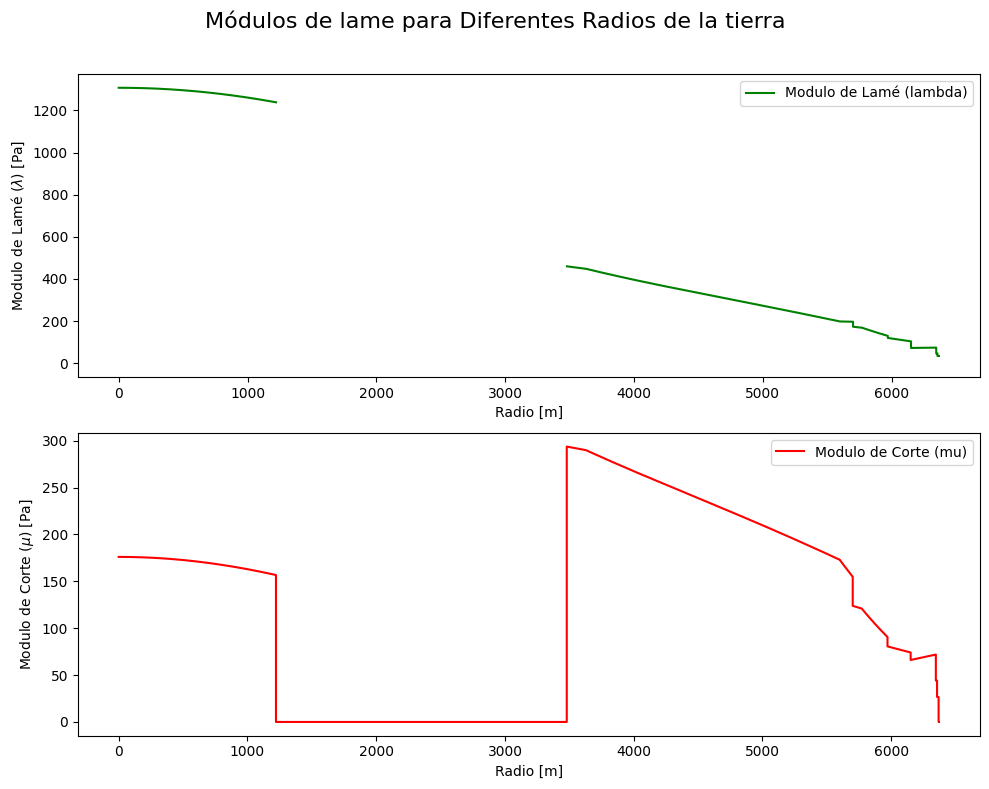

In [8]:
prem['lambda'] = prem['v'] * prem['E'] / ((1 + prem['v']) * (1 - 2 * prem['v']))

## Gráficando los modulos de Lamé
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de lambda
axs[0].plot(prem['radius'], prem['lambda'], label='Modulo de Lamé (lambda)', color='green')
axs[0].set_xlabel('Radio [m]')
axs[0].set_ylabel(r'Modulo de Lamé ($\lambda$) [Pa]')
axs[0].legend()

# Gráfico de mu
axs[1].plot(prem['radius'], prem['mu'], label='Modulo de Corte (mu)', color='red')
axs[1].set_xlabel('Radio [m]')
axs[1].set_ylabel(r'Modulo de Corte ($\mu$) [Pa]')
axs[1].legend()

# Agregar un título global a los subplots
fig.suptitle('Módulos de lame para Diferentes Radios de la tierra', fontsize=16, fontweight='bold')

# Mostrar gráficos
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Ajustar el espacio superior para acomodar el título global
plt.show()

